#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [2]:
#取得 Keras Dataset
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對 Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

### binary crossentropy

In [23]:
import time

In [22]:
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [30]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
start = time.time()
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                          validation_split = 0.25,
                          epochs = 12, batch_size = 128, verbose = 1)         

#[validation_split = 0.2] validation_split：在 0 和 1 之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或 None。每個梯度更新的樣本數。指定，batch_size為128
print(f'running time: {time.time() - start}')

Epoch 1/12
293/293 [==============================] - 167s 569ms/step - loss: 0.3247 - accuracy: 0.1198 - val_loss: 0.3231 - val_accuracy: 0.1574
Epoch 2/12
293/293 [==============================] - 158s 540ms/step - loss: 0.3216 - accuracy: 0.1461 - val_loss: 0.3211 - val_accuracy: 0.1919
Epoch 3/12
293/293 [==============================] - 161s 551ms/step - loss: 0.3185 - accuracy: 0.1723 - val_loss: 0.3183 - val_accuracy: 0.2334
Epoch 4/12
293/293 [==============================] - 160s 546ms/step - loss: 0.3135 - accuracy: 0.1976 - val_loss: 0.3138 - val_accuracy: 0.2510
Epoch 5/12
293/293 [==============================] - 162s 552ms/step - loss: 0.3073 - accuracy: 0.2195 - val_loss: 0.3084 - val_accuracy: 0.2738
Epoch 6/12
293/293 [==============================] - 190s 647ms/step - loss: 0.3012 - accuracy: 0.2411 - val_loss: 0.3030 - val_accuracy: 0.2878
Epoch 7/12
293/293 [==============================] - 167s 570ms/step - loss: 0.2961 - accuracy: 0.2525 - val_loss: 0.2989 -

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

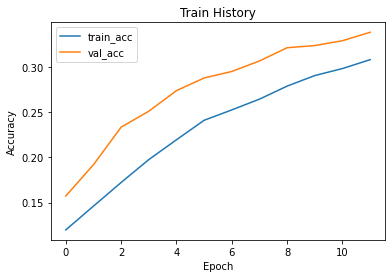

In [32]:
show_train_history('accuracy','val_accuracy')

### MSE

In [33]:
model.compile(loss = 'MSE', optimizer = 'sgd', metrics = ['accuracy'])
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
start = time.time()
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                          validation_split = 0.25,
                          epochs = 12, batch_size = 128, verbose = 1)         

#[validation_split = 0.2] validation_split：在 0 和 1 之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或 None。每個梯度更新的樣本數。指定，batch_size為128
print(f'running time: {time.time() - start}')

Epoch 1/12
293/293 [==============================] - 164s 560ms/step - loss: 0.0807 - accuracy: 0.3138 - val_loss: 0.0822 - val_accuracy: 0.3390
Epoch 2/12
293/293 [==============================] - 171s 584ms/step - loss: 0.0807 - accuracy: 0.3145 - val_loss: 0.0820 - val_accuracy: 0.3427
Epoch 3/12
293/293 [==============================] - 3461s 12s/step - loss: 0.0805 - accuracy: 0.3199 - val_loss: 0.0819 - val_accuracy: 0.3452
Epoch 4/12
293/293 [==============================] - 165s 563ms/step - loss: 0.0803 - accuracy: 0.3210 - val_loss: 0.0817 - val_accuracy: 0.3482
Epoch 5/12
293/293 [==============================] - 156s 533ms/step - loss: 0.0802 - accuracy: 0.3209 - val_loss: 0.0816 - val_accuracy: 0.3490
Epoch 6/12
293/293 [==============================] - 164s 560ms/step - loss: 0.0800 - accuracy: 0.3272 - val_loss: 0.0815 - val_accuracy: 0.3522
Epoch 7/12
293/293 [==============================] - 174s 594ms/step - loss: 0.0799 - accuracy: 0.3255 - val_loss: 0.0814 - 

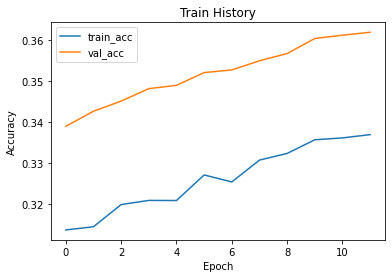

In [34]:
show_train_history('accuracy','val_accuracy')